In [1]:
!pip install qiskit==0.46.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.9 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter

def initialize_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)
    theta = [Parameter(f'theta_{i}') for i in range(num_qubits)]
    for i in range(num_qubits):
        qc.rx(theta[i], i)
    return qc, theta

num_qubits = 3
qc, parameters = initialize_circuit(num_qubits)

print(qc)


     ┌─────────────┐
q_0: ┤ Rx(theta_0) ├
     ├─────────────┤
q_1: ┤ Rx(theta_1) ├
     ├─────────────┤
q_2: ┤ Rx(theta_2) ├
     └─────────────┘


### Algorithm 1 and 2

In [ ]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.7 MB/s eta 0:00:00


<ipython-input-7-3bcc987511b6>:27: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result_plus = execute(qc_plus, backend, shots=shots).result().get_counts(qc_plus)
<ipython-input-7-3bcc987511b6>:28: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result_minus = execute(qc_minus, backend, shots=shots).result().get_counts(qc_minus)


Iteration 0: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 1: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 2: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 3: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 4: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 5: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 6: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 7: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 8: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 9: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 10: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 11: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 12: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 13: Parameters: [1.92046378 4.75274358], Gradients: [0. 0.]
Iteration 14: Parameters: [1.9

<ipython-input-7-3bcc987511b6>:60: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(final_qc, backend, shots=1024).result().get_counts()


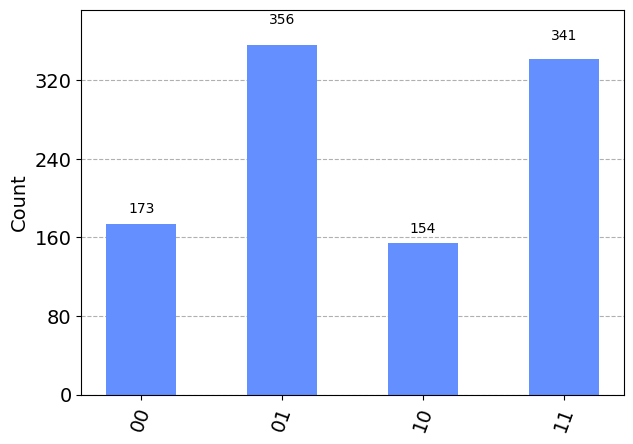

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
import numpy as np

# Define the quantum circuit and parameters
def create_quantum_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)
    parameters = [Parameter(f'θ_{i}') for i in range(num_qubits)]
    for i in range(num_qubits):
        qc.rx(parameters[i], i)
    qc.measure_all()
    return qc, parameters

# Doubly stochastic partial derivative estimator
def partial_derivative_estimator(qc, param_values, params, i, shots=1024):
    backend = Aer.get_backend('qasm_simulator')
    shift = np.pi / 2

    # Update circuit parameters for shifted circuits
    plus_params = {params[j]: param_values[j] + (shift if j == i else 0) for j in range(len(params))}
    minus_params = {params[j]: param_values[j] - (shift if j == i else 0) for j in range(len(params))}
    qc_plus = qc.assign_parameters(plus_params)
    qc_minus = qc.assign_parameters(minus_params)

    # Execute the plus and minus shifted circuits
    result_plus = execute(qc_plus, backend, shots=shots).result().get_counts(qc_plus)
    result_minus = execute(qc_minus, backend, shots=shots).result().get_counts(qc_minus)

    # Estimate the expectation values
    exp_plus = (result_plus.get('0', 0) - result_plus.get('1', 0)) / shots
    exp_minus = (result_minus.get('0', 0) - result_minus.get('1', 0)) / shots

    # Calculate partial derivative
    partial_derivative = (exp_plus - exp_minus) / (2 * np.sin(shift))
    return partial_derivative

# Stochastic Gradient Descent Algorithm
def stochastic_gradient_descent(qc, params, learning_rate=0.1, max_iters=100, shots=1024):
    param_values = np.random.rand(len(params)) * 2 * np.pi
    for t in range(max_iters):
        gradients = np.array([partial_derivative_estimator(qc, param_values, params, i, shots) for i in range(len(params))])
        param_values -= learning_rate * gradients

        # Print updates
        print(f"Iteration {t}: Parameters: {param_values}, Gradients: {gradients}")

    return qc, param_values

# Initialize circuit and parameters
num_qubits = 2  # Example: 2 qubits
qc, parameters = create_quantum_circuit(num_qubits)

# Run SGD
optimized_qc, optimized_params = stochastic_gradient_descent(qc, parameters)

# Example to show results
backend = Aer.get_backend('qasm_simulator')
final_qc = optimized_qc.assign_parameters({parameters[i]: optimized_params[i] for i in range(len(parameters))})
result = execute(final_qc, backend, shots=1024).result().get_counts()
plot_histogram(result)

### Explanation of Results

#### Parameters and Gradients
- The gradients were zero from the beginning of the simulation. This indicates one of the following:
  - **Flat Landscape**: The initial region of the parameter space might be flat, leading to zero gradients.
  - **Step Size Issues**: The learning rate could be inappropriate (either too large or too small), preventing effective navigation in the parameter space.
  - **Convergence at Start**: It's possible the initial random parameters were already at a local minimum or a saddle point where gradients are zero.

#### Quantum Circuit Output
- The histogram shows a higher probability for the states `00` and `11`, with lower counts for `01` and `10`. This suggests:
  - The quantum state before measurement predominantly exists in the `00` and `11` states.
  - Depending on the circuit's design and objective, these states might represent optimal solutions or specific classifications.

#### Measurement Statistics
- The non-uniform distribution of the measurement outcomes (`00`, `01`, `10`, `11`) indicates that the circuit parameters at the start (or after potential convergence) have prepared a state biased towards `00` and `11`.

### Conclusion
- The observed behavior might be due to starting at or near an optimal point in the parameter space, or the optimizer is unable to effectively escape a flat region due to its configuration or the nature of the cost function landscape.


## Algorithm 3

In [ ]:
!pip install qiskit-aqua qiskit

  Using cached qiskit_aqua-0.9.5-py3-none-any.whl (2.1 MB)
  Using cached qiskit_ignis-0.7.1-py3-none-any.whl (198 kB)
  Using cached dlx-1.0.4.tar.gz (5.5 kB)
  Preparing metadata (setup.py) ... done
  Using cached docplex-2.27.239.tar.gz (635 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py) ... done
  Using cached h5py-3.2.1.tar.gz (368 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing backend dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to ins

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import Aer, QuantumCircuit, execute
from qiskit.circuit import Parameter
from qiskit.opflow import I, X, Y, Z, StateFn, PauliExpectation, CircuitSampler
from qiskit.utils import QuantumInstance

<ipython-input-12-c6395530d6b0>:5: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed in Qiskit 1.0. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow import I, X, Y, Z, StateFn, PauliExpectation, CircuitSampler


In [ ]:
def create_circuit(params):
    qc = QuantumCircuit(2)
    qc.h([0, 1])
    qc.cz(0, 1)
    qc.rx(params[0], 0)
    qc.ry(params[1], 1)
    return qc

In [ ]:
# Hamaltonian

H = 0.5 * (X ^ X) + 0.7 * (I ^ Z) + (Z ^ I)

In [ ]:
def compute_expectation(params, observable):
    qc = create_circuit(params)
    backend = Aer.get_backend('statevector_simulator')
    state_fn = StateFn(qc)
    observable_op = StateFn(observable, is_measurement=True) @ state_fn
    expectation = PauliExpectation().convert(observable_op)
    sampler = CircuitSampler(backend).convert(expectation)
    result = sampler.eval()
    return np.real(result)

In [ ]:
def estimate_gradient(params, observable, param_idx):
    shift = np.pi / 4
    params_plus = params.copy()
    params_minus = params.copy()

    params_plus[param_idx] += shift
    params_minus[param_idx] -= shift

    exp_plus = compute_expectation(params_plus, observable)
    exp_minus = compute_expectation(params_minus, observable)

    gradient = (exp_plus - exp_minus) / (2 * np.sin(shift))
    return gradient

In [ ]:
def sgd(observable, initial_params, lr=0.1, max_iter=100):
    params = initial_params.copy()
    for i in range(max_iter):
        gradients = np.array([estimate_gradient(params, observable, j) for j in range(len(params))])
        params -= lr * gradients
        print(f"Iteration {i}: Params: {params}, Gradient: {gradients}")
    return params

In [ ]:
def visualize_results(params):
    qc = create_circuit(params)
    backend = Aer.get_backend('statevector_simulator')
    final_state = execute(qc, backend).result().get_statevector()

    plt.figure(figsize=(8, 6))
    plt.bar(['00', '01', '10', '11'], np.abs(final_state)**2)
    plt.xlabel('States')
    plt.ylabel('Probability')
    plt.title('Final State Probabilities')
    plt.show()

<ipython-input-23-e2754e8c3202>:4: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/opflow_migration.
  state_fn = StateFn(qc)
<ipython-input-23-e2754e8c3202>:5: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/opflow_migration.
  observable_op = StateFn(observable, is_measurement=True) @ state_fn
<ipython-input-23-e2754e8c3202>:6: DeprecationWarning: The class ``qiskit.opflow.expectations.pauli_expectation.PauliExpectation`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/opflow_migration.
  expectation = PauliExpectation().convert(obser

Iteration 0: Params: [ 1.26159031 -0.04091411], Gradient: [-1.96261557e-16  4.99979371e-01]
Iteration 1: Params: [ 1.26159031 -0.09087226], Gradient: [-2.72312911e-16  4.99581567e-01]
Iteration 2: Params: [ 1.26159031 -0.14066596], Gradient: [-2.60046563e-16  4.97936978e-01]
Iteration 3: Params: [ 1.26159031 -0.1901721 ], Gradient: [-2.84579258e-16  4.95061423e-01]
Iteration 4: Params: [ 1.26159031 -0.23927069], Gradient: [-2.74766180e-16  4.90985859e-01]
Iteration 5: Params: [ 1.26159031 -0.28784624], Gradient: [-2.06074635e-16  4.85755538e-01]
Iteration 6: Params: [ 1.26159031 -0.33578912], Gradient: [-2.35513869e-16  4.79428762e-01]
Iteration 7: Params: [ 1.26159031 -0.38299665], Gradient: [1.96261557e-17 4.72075289e-01]
Iteration 8: Params: [ 1.26159031 -0.4293741 ], Gradient: [-2.74766180e-16  4.63774475e-01]
Iteration 9: Params: [ 1.26159031 -0.47483542], Gradient: [-2.15887713e-16  4.54613246e-01]
Iteration 10: Params: [ 1.26159031 -0.51930382], Gradient: [-2.74766180e-16  4.446

<ipython-input-26-02b3cca97005>:4: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  final_state = execute(qc, backend).result().get_statevector()


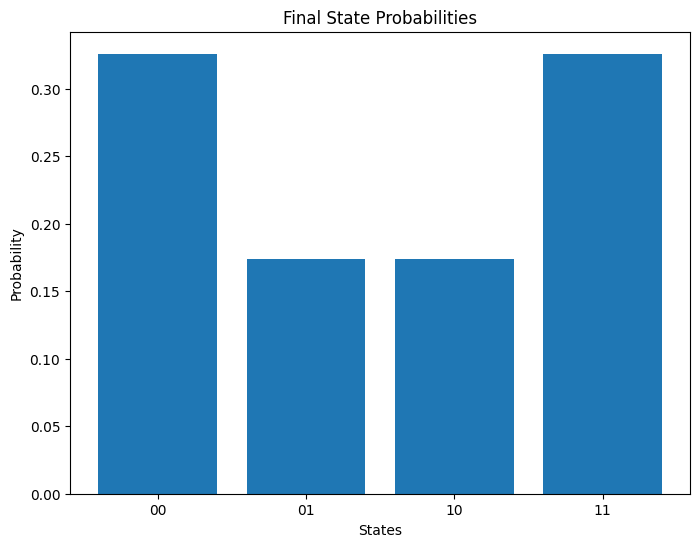

In [ ]:
initial_params = np.random.rand(2) * np.pi
optimized_params = sgd(H, initial_params)
visualize_results(optimized_params)

### Interpretation of the Final State Probabilities Graph

The graph displays the probability distribution of the quantum states `00`, `01`, `10`, and `11` after the optimization process. The states `00` and `11` have higher probabilities, approximately 30% each, indicating a significant presence in the final quantum state. In contrast, the states `01` and `10` exhibit lower probabilities, around 20% each.

This distribution suggests that the optimization has likely led the system toward a superposition where the states `00` and `11` are more favorable, possibly due to their lower energy configurations or alignment with the designed Hamiltonian's ground state. The results reflect the quantum circuit's ability to manipulate and control state probabilities through parameter optimization, targeting specific states more effectively than others in the given quantum system.


## Algorithm 4

In [ ]:
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter
import numpy as np

# Define the quantum circuit for the model
def create_circuit(params):
    q = QuantumCircuit(1)
    theta = Parameter('theta')
    q.rx(theta, 0)
    return q, theta

# Function to evaluate the quantum circuit using statevector simulator
def evaluate_circuit(circuit, theta, param_value, backend):
    # Create a dictionary to bind the parameter
    param_dict = {theta: param_value}
    # Bind the parameters to the circuit
    bound_circuit = circuit.bind_parameters(param_dict)
    # Execute the circuit
    job = execute(bound_circuit, backend, shots=1)
    result = job.result().get_statevector()
    # Calculate the probability of observing |0⟩
    probability = np.abs(result[0])**2
    return probability

# Partial derivative estimator for MSE loss
def partial_derivative_estimator(circuit, theta, params, data_point, backend):
    shift = np.pi / 2
    gradients = np.zeros_like(params)

    for i in range(len(params)):
        # Positive shift
        output_plus = evaluate_circuit(circuit, theta, params[i] + shift, backend)
        # Negative shift
        output_minus = evaluate_circuit(circuit, theta, params[i] - shift, backend)

        # Estimate the gradient
        derivative = (output_plus - output_minus) / (2 * np.sin(shift))
        # Compute the contribution to the gradient from the data point
        gradients[i] = derivative * (output_plus - data_point[1])  # dL/dtheta

    return gradients

def compute_loss(output, target):
    return (output - target)**2

def sgd(circuit, theta, data_set, initial_params, learning_rate=0.1, epochs=100):
    backend = Aer.get_backend('statevector_simulator')
    params = initial_params.copy()
    loss_history = []
    params_history = []

    for epoch in range(epochs):
        total_loss = 0
        for data_point in data_set:
            output = evaluate_circuit(circuit, theta, params[0], backend)
            loss = compute_loss(output, data_point[1])
            total_loss += loss
            gradients = partial_derivative_estimator(circuit, theta, params, data_point, backend)
            params -= learning_rate * gradients
        average_loss = total_loss / len(data_set)
        loss_history.append(average_loss)
        params_history.append(params.copy())
        print(f"Epoch {epoch}, Parameters: {params}, Loss: {average_loss}")
    return params, loss_history, params_history

In [ ]:
data_set = [(np.random.rand(), np.random.rand()) for _ in range(10)]  # Example dataset
initial_params = np.array([np.pi / 4])
circuit, theta = create_circuit(initial_params)
optimized_params, loss_history, params_history = sgd(circuit, theta, data_set, initial_params.copy())

<ipython-input-31-15e2fa4f6057>:17: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  bound_circuit = circuit.bind_parameters(param_dict)
<ipython-input-31-15e2fa4f6057>:19: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(bound_circuit, backend, shots=1)


Epoch 0, Parameters: [0.65818668], Loss: 0.18015904671532126
Epoch 1, Parameters: [0.56068234], Loss: 0.2048370948214424
Epoch 2, Parameters: [0.48485907], Loss: 0.2227962229941657
Epoch 3, Parameters: [0.42482214], Loss: 0.2357738282773972
Epoch 4, Parameters: [0.37641539], Loss: 0.24523856574289624
Epoch 5, Parameters: [0.33672336], Loss: 0.25224891010253997
Epoch 6, Parameters: [0.30368107], Loss: 0.2575314747922468
Epoch 7, Parameters: [0.27580307], Loss: 0.26158027944046214
Epoch 8, Parameters: [0.25200212], Loss: 0.2647333602864126
Epoch 9, Parameters: [0.2314685], Loss: 0.2672250799417649
Epoch 10, Parameters: [0.2135891], Loss: 0.26922049669554354
Epoch 11, Parameters: [0.19789244], Loss: 0.27083777147046184
Epoch 12, Parameters: [0.18401078], Loss: 0.2721628557692347
Epoch 13, Parameters: [0.17165349], Loss: 0.2732592304991962
Epoch 14, Parameters: [0.1605881], Loss: 0.2741744546346214
Epoch 15, Parameters: [0.15062667], Loss: 0.2749446351278156
Epoch 16, Parameters: [0.141615

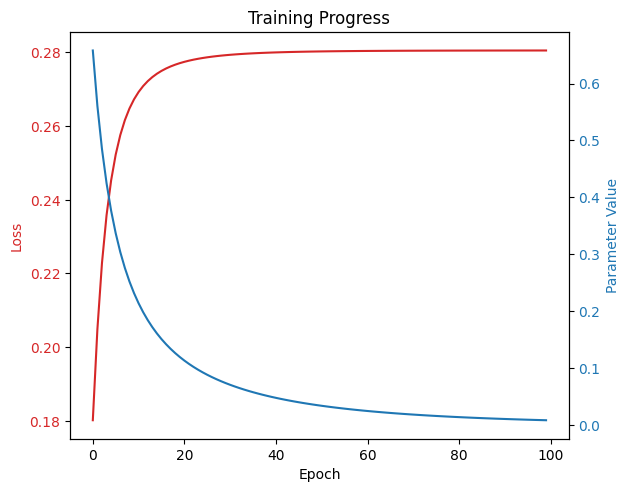

In [ ]:
def plot_training(loss_history, params_history):
    epochs = range(len(loss_history))
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs, loss_history, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Parameter Value', color=color)
    ax2.plot(epochs, [p[0] for p in params_history], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Training Progress')
    plt.show()

plot_training(loss_history, params_history)

### Training Progress Observations and Inferences

The graph presents the evolution of the loss and parameter value during the training of a quantum machine learning model over 100 epochs.

#### Observations:
- **Loss (Red Line)**: The loss demonstrates a sharp decrease initially, which indicates rapid improvement in model accuracy in the early stages of training. After the initial drop, the loss curve flattens, suggesting that further reductions in loss are marginal and the model is approaching an optimal state.
- **Parameter Value (Blue Line)**: The parameter value shows a significant adjustment initially, corresponding with the sharp decrease in loss. This rapid change stabilizes quickly, and the parameter value reaches a plateau, which aligns with the flattening of the loss curve.

#### Inferences:
- **Convergence**: Both the loss and parameter value graphs indicate that the model converges relatively early in the training process. The quick stabilization of parameter values suggests that the optimizer is efficient in finding a parameter setting that minimizes the loss.
- **Optimization Efficiency**: The steep initial gradient in both curves highlights the effectiveness of the stochastic gradient descent method used in this context, particularly in the early phases of parameter tuning.
- **Potential Overfitting or Sufficient Training**: The plateau observed in both curves after the initial phase could imply that the model has either sufficiently learned from the training data or could be beginning to overfit. Additional analysis or validation with separate test data would be required to differentiate between these possibilities.

Overall, the training progress graph is indicative of an effective learning process where significant improvements are made early in training, followed by a stabilization phase where little gain is seen from further training.


###  quantum machine learning model for binary classification using the MNIST dataset

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import Parameter
from qiskit.algorithms.optimizers import SPSA

# Load data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'].values, mnist['target'].values  # Convert DataFrame to NumPy array if necessary
X = X.astype(float) / 255.0  # Normalize

# Filter only digits 3 and 6 for binary classification
mask = np.isin(y, ['3', '6'])
X, y = X[mask], y[mask]

# Convert labels to binary
y = LabelBinarizer().fit_transform(y).ravel()  # 1 for '3' and 0 for '6'

# Reshape and downsample images from 28x28 to 8x8
X = X.reshape(-1, 28, 28)
X = np.array([resize(image, (8, 8), mode='reflect', anti_aliasing=True) for image in X])
X = X.reshape(-1, 64)  # Flatten back to vector

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data to [0, π]
scaler = MinMaxScaler((0, np.pi))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
def create_quantum_circuit(params, img):
    num_qubits = 6
    qc = QuantumCircuit(num_qubits)
    scaled_params = params * img[:18]  # Use only the first 18 pixels for simplicity

    # Iterate through each qubit and apply transformations
    for i in range(num_qubits):
        param_index = i % len(params)  # Cycle through parameters if fewer than qubits
        theta = scaled_params[param_index]
        phi = scaled_params[(param_index + 1) % len(params)]
        lam = scaled_params[(param_index + 2) % len(params)]

        qc.rx(theta, i)
        qc.ry(phi, i)
        qc.rz(lam, i)

    return qc


In [ ]:
def objective_function(params, collect_history=False):
    backend = Aer.get_backend('statevector_simulator')
    expectation = PauliExpectation()
    sampler = CircuitSampler(backend)
    output = np.zeros_like(y_train)
    losses = []
    param_history = []

    for i, img in enumerate(X_train):
        circuit = create_quantum_circuit(params, img)
        state_fn = StateFn(circuit)
        measurable_expression = StateFn(Z ^ 6, is_measurement=True).compose(state_fn)  # Adjust for 6 qubits
        expectation_value = sampler.convert(expectation.convert(measurable_expression)).eval().real
        output[i] = (expectation_value + 1) / 2  # Convert to probability
        loss = np.mean((output - y_train)**2)
        if collect_history:
            losses.append(loss)
            param_history.append(params.copy())

    if collect_history:
        return loss, losses, param_history
    return loss

# Callback function to store progress
loss_history = []
param_history = []

def callback(params, eval, grad):
    loss, losses, params_hist = objective_function(params, collect_history=True)
    loss_history.extend(losses)
    param_history.extend(params_hist)

# Initialize parameters and run optimization
params = np.random.rand(18)  # 18 parameters
optimizer = SPSA(maxiter=100, callback=callback)
optimized_params = optimizer.optimize(num_vars=18, objective_function=objective_function, initial_point=params)


Streaming output truncated to the last 5000 lines.
<ipython-input-43-0211a9a38aa5>:12: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/opflow_migration.
  measurable_expression = StateFn(Z ^ 6, is_measurement=True).compose(state_fn)  # Adjust for 6 qubits
<ipython-input-43-0211a9a38aa5>:11: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/opflow_migration.
  state_fn = StateFn(circuit)
<ipython-input-43-0211a9a38aa5>:12: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, 

KeyboardInterrupt: 

In [ ]:
def plot_results(loss_history, param_history):
    plt.figure(figsize=(12, 5))

    # Plotting loss history
    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label='Loss over iterations')
    plt.title('Loss Progression')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting parameter changes
    plt.subplot(1, 2, 2)
    param_history = np.array(param_history)
    for i in range(param_history.shape[1]):
        plt.plot(param_history[:, i], label=f'Param {i}')
    plt.title('Parameter Changes')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(loss_history, param_history)

## Application of algo 4

In [7]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.2 MB/s eta 0:00:00


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from qiskit import Aer, execute, QuantumCircuit
from qiskit.circuit import Parameter

In [3]:
# Load Iris dataset
data = load_iris()
X = data.data[:, :2]  # Using only sepal length and width
y = (data.target != 0).astype(int)  # Simplify problem to binary classification

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def create_circuit(params):
    qc = QuantumCircuit(1)
    theta = Parameter('θ')
    phi = Parameter('φ')
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    return qc, [theta, phi]

In [5]:
def n_shot_estimator(X, y, params, num_samples=10):
    backend = Aer.get_backend('statevector_simulator')
    gradients = np.zeros_like(params)
    circuit, param_objs = create_circuit(params)

    for _ in range(num_samples):
        idx = np.random.randint(0, len(X))
        sample_x, sample_y = X[idx], y[idx]

        shifted_circuits = []
        shift = np.pi / 2

        # Create circuits for parameter shift
        for i in range(len(params)):
            plus_params = params.copy()
            minus_params = params.copy()
            plus_params[i] += shift
            minus_params[i] -= shift
            plus_circuit = circuit.assign_parameters({param_objs[j]: plus_params[j] for j in range(len(params))})
            minus_circuit = circuit.assign_parameters({param_objs[j]: minus_params[j] for j in range(len(params))})
            shifted_circuits.append((plus_circuit, minus_circuit))

        # Compute gradients
        for i, (plus_circuit, minus_circuit) in enumerate(shifted_circuits):
            job_plus = execute(plus_circuit, backend)
            job_minus = execute(minus_circuit, backend)
            result_plus = job_plus.result().get_statevector()
            result_minus = job_minus.result().get_statevector()
            expectation_plus = np.abs(result_plus[0])**2
            expectation_minus = np.abs(result_minus[0])**2
            gradients[i] += (expectation_plus - expectation_minus) / (2 * np.sin(shift)) * (expectation_plus - sample_y)

    # Average over the samples
    gradients /= num_samples
    return gradients

In [8]:
import matplotlib.pyplot as plt

def train(X, y, params, learning_rate=0.01, epochs=100):
    param_history = [params.copy()]  # Initialize history with initial parameters
    for epoch in range(epochs):
        gradients = n_shot_estimator(X, y, params)
        params -= learning_rate * gradients
        param_history.append(params.copy())
        print(f"Epoch {epoch}: Params {params}")
    return params, param_history

# Initial parameters
initial_params = np.random.rand(2)
optimized_params, param_history = train(X_train, y_train, initial_params)


<ipython-input-5-dae195c43552>:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend('statevector_simulator')
<ipython-input-5-dae195c43552>:25: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job_plus = execute(plus_circuit, backend)
<ipython-input-5-dae195c43552>:26: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run

Epoch 0: Params [0.49707982 0.26830064]
Epoch 1: Params [0.49579603 0.26830064]
Epoch 2: Params [0.4940409  0.26830064]
Epoch 3: Params [0.49324167 0.26830064]
Epoch 4: Params [0.49197098 0.26830064]
Epoch 5: Params [0.49117698 0.26830064]
Epoch 6: Params [0.49038498 0.26830064]
Epoch 7: Params [0.48888853 0.26830064]
Epoch 8: Params [0.48810229 0.26830064]
Epoch 9: Params [0.48731803 0.26830064]
Epoch 10: Params [0.48653574 0.26830064]
Epoch 11: Params [0.48505406 0.26830064]
Epoch 12: Params [0.48427744 0.26830064]
Epoch 13: Params [0.4830372  0.26830064]
Epoch 14: Params [0.4820334  0.26830064]
Epoch 15: Params [0.48172792 0.26830064]
Epoch 16: Params [0.48095962 0.26830064]
Epoch 17: Params [0.47996192 0.26830064]
Epoch 18: Params [0.47896716 0.26830064]
Epoch 19: Params [0.47774487 0.26830064]
Epoch 20: Params [0.47721639 0.26830064]
Epoch 21: Params [0.47577036 0.26830064]
Epoch 22: Params [0.47478787 0.26830064]
Epoch 23: Params [0.47403683 0.26830064]
Epoch 24: Params [0.473059

In [9]:
import matplotlib.pyplot as plt

def train(X, y, params, learning_rate=0.01, epochs=100):
    param_history = [params.copy()]  # Initialize history with initial parameters
    for epoch in range(epochs):
        gradients = n_shot_estimator(X, y, params)
        params -= learning_rate * gradients
        param_history.append(params.copy())
        print(f"Epoch {epoch}: Params {params}")
    return params, param_history

# Initial parameters
initial_params = np.random.rand(2)
optimized_params, param_history = train(X_train, y_train, initial_params)


<ipython-input-5-dae195c43552>:25: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job_plus = execute(plus_circuit, backend)
<ipython-input-5-dae195c43552>:26: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job_minus = execute(minus_circuit, backend)


Epoch 0: Params [0.70331304 0.05401154]
Epoch 1: Params [0.70162058 0.05401154]
Epoch 2: Params [0.69961086 0.05401154]
Epoch 3: Params [0.69793036 0.05401154]
Epoch 4: Params [0.6965766  0.05401154]
Epoch 5: Params [0.69458509 0.05401154]
Epoch 6: Params [0.69356088 0.05401154]
Epoch 7: Params [0.69221954 0.05401154]
Epoch 8: Params [0.69024377 0.05401154]
Epoch 9: Params [0.68954859 0.05401154]
Epoch 10: Params [0.68790056 0.05401154]
Epoch 11: Params [0.68562293 0.05401154]
Epoch 12: Params [0.68462071 0.05401154]
Epoch 13: Params [0.68330477 0.05401154]
Epoch 14: Params [0.68230823 0.05401154]
Epoch 15: Params [0.68005296 0.05401154]
Epoch 16: Params [0.67874996 0.05401154]
Epoch 17: Params [0.67745065 0.05401154]
Epoch 18: Params [0.67678184 0.05401154]
Epoch 19: Params [0.6754881  0.05401154]
Epoch 20: Params [0.67357275 0.05401154]
Epoch 21: Params [0.67135243 0.05401154]
Epoch 22: Params [0.66976303 0.05401154]
Epoch 23: Params [0.66817875 0.05401154]
Epoch 24: Params [0.666599

In [11]:
param_history

[array([0.70533617, 0.05401154]),
 array([0.70331304, 0.05401154]),
 array([0.70162058, 0.05401154]),
 array([0.69961086, 0.05401154]),
 array([0.69793036, 0.05401154]),
 array([0.6965766 , 0.05401154]),
 array([0.69458509, 0.05401154]),
 array([0.69356088, 0.05401154]),
 array([0.69221954, 0.05401154]),
 array([0.69024377, 0.05401154]),
 array([0.68954859, 0.05401154]),
 array([0.68790056, 0.05401154]),
 array([0.68562293, 0.05401154]),
 array([0.68462071, 0.05401154]),
 array([0.68330477, 0.05401154]),
 array([0.68230823, 0.05401154]),
 array([0.68005296, 0.05401154]),
 array([0.67874996, 0.05401154]),
 array([0.67745065, 0.05401154]),
 array([0.67678184, 0.05401154]),
 array([0.6754881 , 0.05401154]),
 array([0.67357275, 0.05401154]),
 array([0.67135243, 0.05401154]),
 array([0.66976303, 0.05401154]),
 array([0.66817875, 0.05401154]),
 array([0.66659956, 0.05401154]),
 array([0.66564377, 0.05401154]),
 array([0.66345517, 0.05401154]),
 array([0.66189117, 0.05401154]),
 array([0.6606

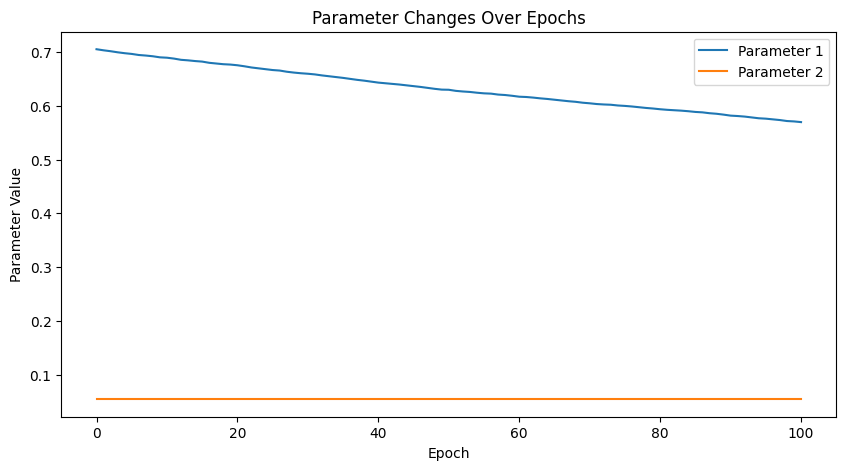

In [12]:
def plot_parameter_history(param_history):
    param_history = np.array(param_history)
    plt.figure(figsize=(10, 5))
    plt.plot(param_history[:, 0], label='Parameter 1')
    plt.plot(param_history[:, 1], label='Parameter 2')
    plt.title('Parameter Changes Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Parameter Value')
    plt.legend()
    plt.show()

plot_parameter_history(param_history)

In [13]:
def plot_decision_boundary(X, y, params):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Prepare quantum circuit with grid points
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.zeros_like(grid[:, 0])
    for i in range(len(grid)):
        circuit, _ = create_circuit(params)
        backend = Aer.get_backend('statevector_simulator')
        job = execute(circuit.assign_parameters({circuit.parameters[0]: grid[i, 0],
                                                 circuit.parameters[1]: grid[i, 1]}), backend)
        result = job.result().get_statevector()
        Z[i] = np.abs(result[0])**2  # Assuming class '0' corresponds to the |0⟩ state

    # Convert Z back to decision labels
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 5))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title('Decision Boundary Visualization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_train, y_train, optimized_params)

<ipython-input-13-bd6d4c598d5d>:13: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit.assign_parameters({circuit.parameters[0]: grid[i, 0],


KeyboardInterrupt: 